<a href="https://colab.research.google.com/github/shakib68/NYC-taxi-capstone/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

**Importing  libraries**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import  seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading data**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone project 2/Copy of NYC Taxi Data.csv")


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


**Checking Datatype in our Dataset**

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [64]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,dropoff_day_no,pickup_hour,dropoff_hour,dropoff_month
count,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06,1.448817e+06
mean,1.533892e+00,1.663891e+00,-7.397374e+01,4.075103e+01,-7.397358e+01,4.075178e+01,8.342475e+02,3.418275e+00,3.054341e+00,1.360703e+01,1.360086e+01,3.516794e+00
std,4.988502e-01,1.313453e+00,6.786583e-02,2.854538e-02,6.643344e-02,3.250805e-02,6.454540e+02,3.829808e+00,1.956365e+00,6.399066e+00,6.481671e+00,1.680997e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.531031e+01,-1.219333e+02,3.517355e+01,1.000000e+00,4.241756e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399188e+01,4.073744e+01,-7.399133e+01,4.073593e+01,3.980000e+02,1.239604e+00,1.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398177e+01,4.075415e+01,-7.397978e+01,4.075453e+01,6.620000e+02,2.099717e+00,3.000000e+00,1.400000e+01,1.400000e+01,4.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396747e+01,4.076836e+01,-7.396314e+01,4.076978e+01,1.072000e+03,3.875766e+00,5.000000e+00,1.900000e+01,1.900000e+01,5.000000e+00
max,2.000000e+00,8.000000e+00,-7.207433e+01,4.169680e+01,-7.202241e+01,4.169335e+01,5.999000e+03,2.499989e+01,6.000000e+00,2.300000e+01,2.300000e+01,7.000000e+00


**Checking missing value**

In [7]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


**Here you can see there is no missing value in our dataset, So will proceed for solution and analysis**

**Importing geopy library to calculate distance**


In [8]:
from geopy.distance import great_circle

**Calculte distance betwee pickup and dropoff points**

In [9]:
#Calculte distance betwee pickup and dropoff points
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [10]:
# Calculating distance for each trip
df['distance'] = df.apply(lambda df: distance_cal(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'] ), axis=1)


In [11]:
df['distance']

0          1.498523
1          1.805510
2          6.385108
3          1.485501
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: distance, Length: 1458644, dtype: float64

**converting it to datetime**

In [12]:
#convert it to datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [13]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

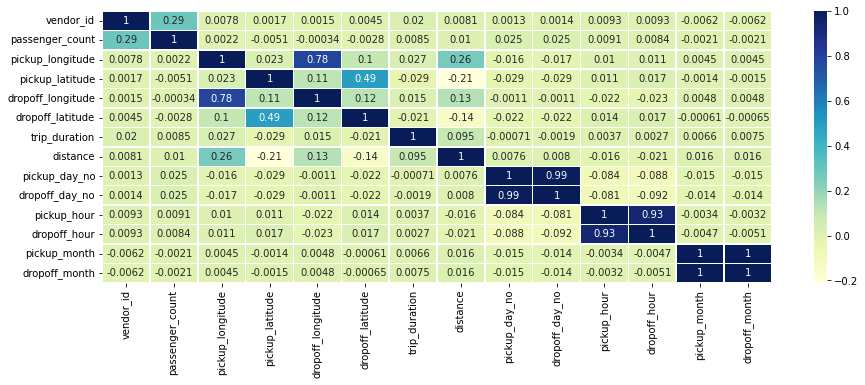

In [14]:
# correlation graph of the data
fig, ax = plt.subplots(figsize=(15,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

  
# displaying heatmap
plt.show()

**Here we can see that the is strongly correlated but the column is important for analysis. further to remove multi collinearity we remove the pickup_month and pickup_day column as pickup_month and dropoff_month has exact same value**

In [15]:
df.drop(['pickup_month'],inplace=True ,axis=1)
df.drop(['pickup_day_no'], inplace=True,axis=1)

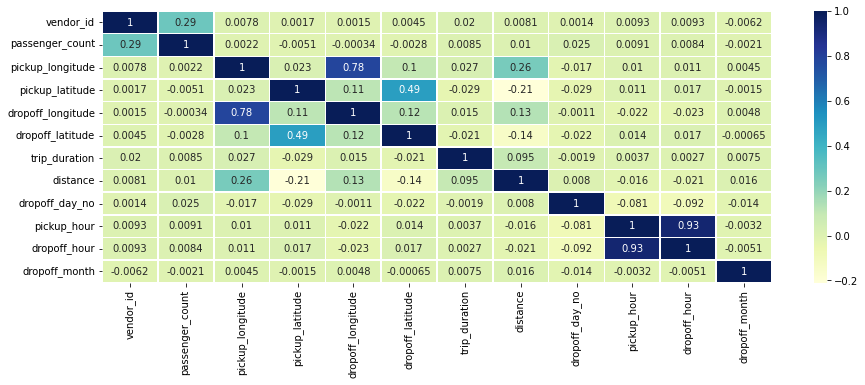

In [16]:
# correlation graph of the data
fig, ax = plt.subplots(figsize=(15,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

  
# displaying heatmap
plt.show()

**Now the data is looking good**

**Checking for outlier in column trip duration**

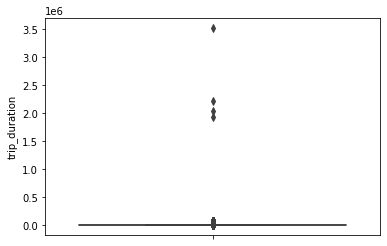

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


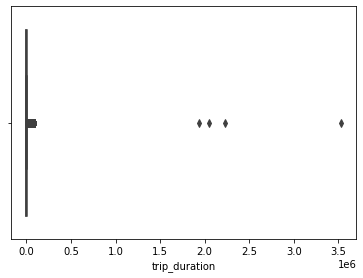

In [17]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y=df['trip_duration'])
plt.show()
columns=['trip_duration']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

**You can see that there are some outliers in dataset so we will try to fin 0-100 percentile value  to find a the correct percentile value for removal of outliers**

In [18]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])


0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


**We can see that the value of outlier is in the range from 90 to 100 percentile but we do not  know exactly so we do some more step from 90-100**

In [19]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [20]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in np.linspace(99.0,100.0,10 ,endpoint=False):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])


99.0 percentile value is 3440
99.1 percentile value is 3540
99.2 percentile value is 3652
99.3 percentile value is 3782
99.4 percentile value is 3942
99.5 percentile value is 4139
99.6 percentile value is 4403
99.7 percentile value is 4765
99.8 percentile value is 5552
99.9 percentile value is 85129
100 percentile value is  3526282


**From here we can set the value for trip duration less than 6000 ,otherwise all the values>6000 will be treated as outlier**

In [21]:
df=df[df['trip_duration']<6000]

In [22]:
df.shape

(1456077, 18)

**Oulier in distance column**

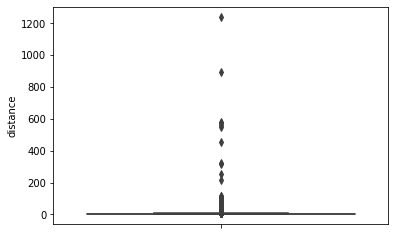

In [45]:

sns.boxplot(y=df['distance'])
plt.show()

**we can see that there are some outlier**

In [46]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.7924134211150853
20 percentile value is 1.0893497812552733
30 percentile value is 1.3794869434209944
40 percentile value is 1.7057352713673846
50 percentile value is 2.0926995012932776
60 percentile value is 2.595889207085343
70 percentile value is 3.3341394845341545
80 percentile value is 4.614538908960717
90 percentile value is 7.614955258148908
100 percentile value is  1240.9104296218293


**Will try to find 90-100 percentile value to get clear value**

In [47]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 7.614955258148908
91 percentile value is 8.23607387929263
92 percentile value is 8.871896977366985
93 percentile value is 9.441865603237655
94 percentile value is 10.061134860180474
95 percentile value is 10.984773241071363
96 percentile value is 12.750179621927309
97 percentile value is 15.328131336666662
98 percentile value is 19.312971497271114
99 percentile value is 20.767958912153794
100 percentile value is  1240.9104296218293


**have to see the percentile from 99-100 to get more clear picture**

In [48]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in np.linspace(99.0,100.0,10 ,endpoint=False):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

99.0 percentile value is 20.767958912153794
99.1 percentile value is 20.90531369130979
99.2 percentile value is 21.03687107189133
99.3 percentile value is 21.17573512022947
99.4 percentile value is 21.352068298844006
99.5 percentile value is 21.54658321110956
99.6 percentile value is 21.813464573568343
99.7 percentile value is 22.248730062112042
99.8 percentile value is 22.869731288725582
99.9 percentile value is 24.673666654784668
100 percentile value is  1240.9104296218293


In [53]:
df['distance'].value_counts()


0.000000     5894
0.000424       45
0.000424       43
0.000424       35
0.000424       22
             ... 
5.341822        1
0.937296        1
1.057748        1
19.743273       1
1.134044        1
Name: distance, Length: 1448432, dtype: int64

**We can take value as 25 becouse 99.9 percentile value are less than it**

In [51]:
df=df[df['distance']<25]

**We will only keep those observation whose distance is greater than 0**

In [54]:
df=df[df['distance']!=0]


In [58]:
df['distance'].value_counts()


0.000424     45
0.000424     43
0.000424     35
0.000424     22
0.000424     21
             ..
5.341822      1
0.937296      1
1.057748      1
19.743273     1
1.134044      1
Name: distance, Length: 1448431, dtype: int64

In [55]:
df.shape

(1448817, 20)

In [59]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
distance                     float64
pickup_day                    object
dropoff_day                   object
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
dropoff_month                  int64
picktime                      object
droptime                      object
dtype: object

**Passenger Analysis**

In [56]:
df.passenger_count.value_counts()


1    1026802
2     208894
5      77506
3      59499
6      47893
4      28169
0         51
7          2
8          1
Name: passenger_count, dtype: int64

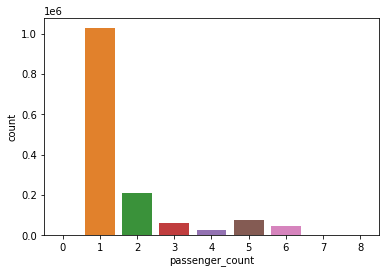

In [57]:
sns.countplot(x='passenger_count',data=df)





**Daily dropoff analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


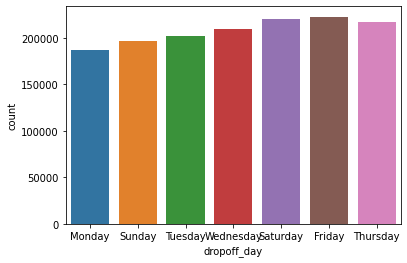

In [32]:
sns.countplot(df['dropoff_day'])


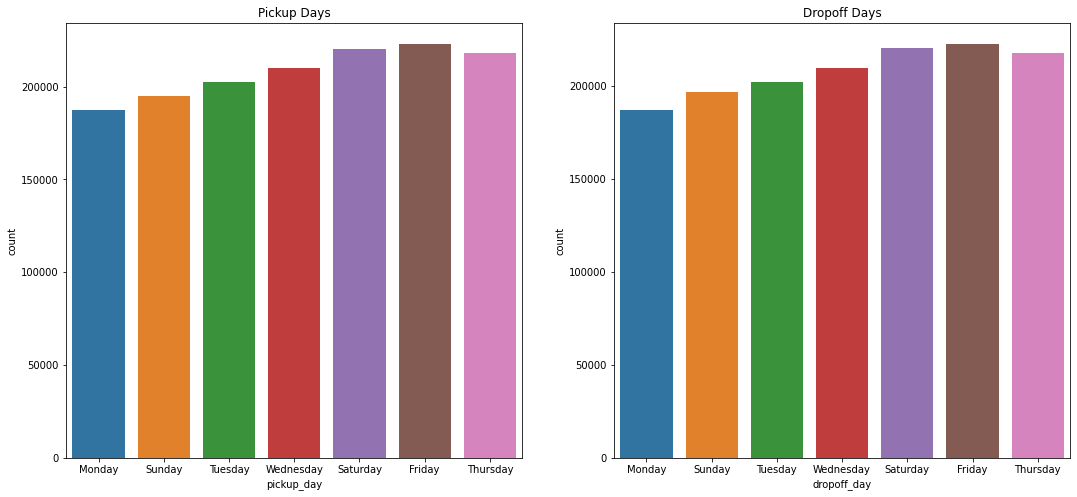

In [31]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pickup Days')


sns.countplot(x=df['pickup_day'],ax=axs[0])

axs[1].set_title('Dropoff Days')
sns.countplot(x=df['dropoff_day'],ax=axs[1])

**hourly Analysis**

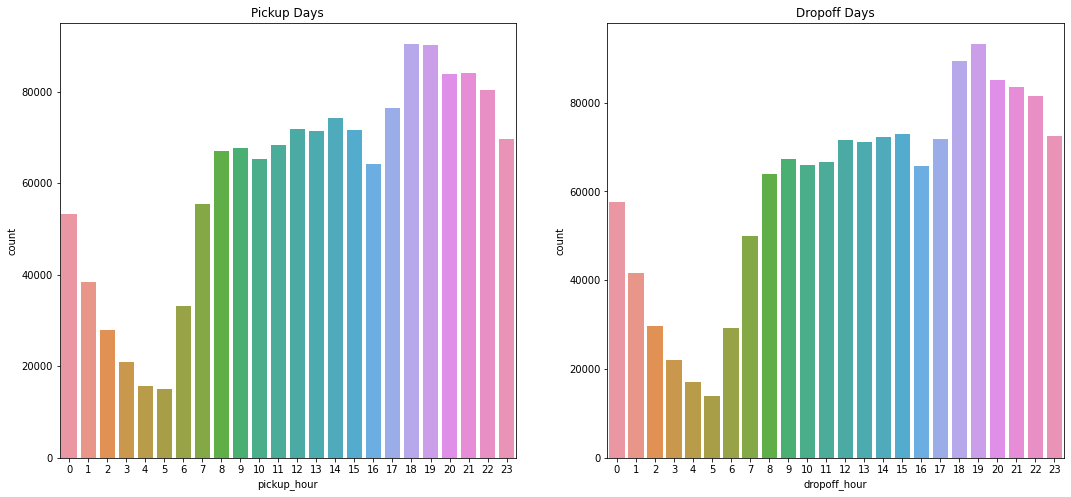

In [33]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pickup Days')


sns.countplot(x=df['pickup_hour'],ax=axs[0])

axs[1].set_title('Dropoff Days')
sns.countplot(x=df['dropoff_hour'],ax=axs[1])

**Monthly Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


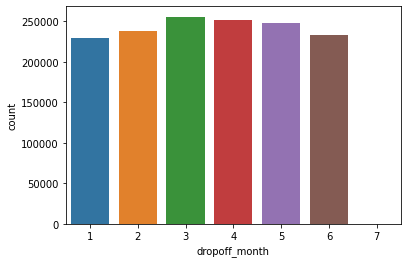

In [39]:
sns.countplot(df['dropoff_month'])


**Setting a time cycle of a day **

In [40]:
def day_time(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [41]:
df['picktime']=df['pickup_hour'].apply(day_time)
df['droptime']=df['dropoff_hour'].apply(day_time)

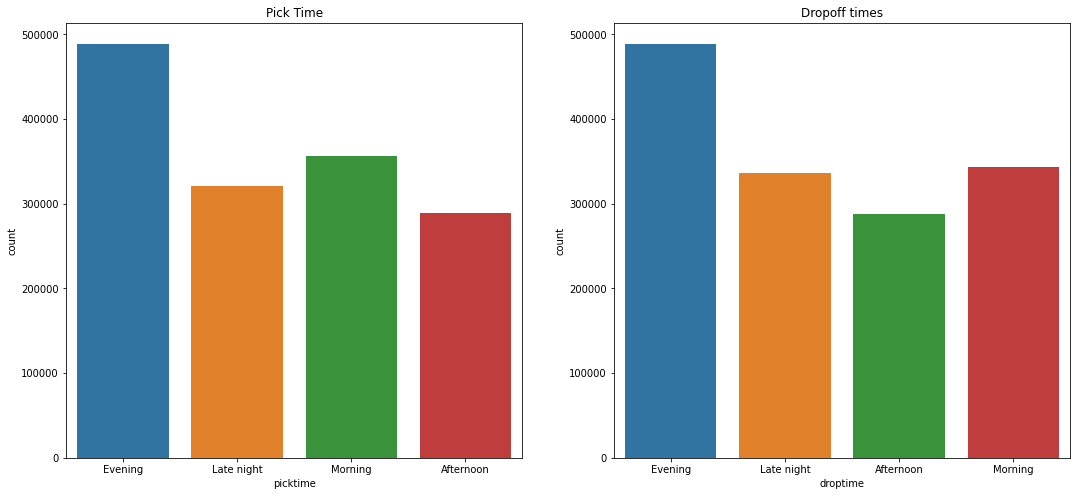

In [43]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pick Time')


sns.countplot(x=df['picktime'],ax=axs[0])

axs[1].set_title('Dropoff times')
sns.countplot(x=df['droptime'],ax=axs[1])

**Based on vendor id**

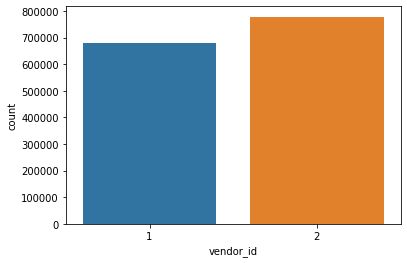

In [44]:
sns.countplot(x='vendor_id',data=df)


SyntaxError: ignored

In [62]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
distance                     float64
pickup_day                    object
dropoff_day                   object
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
dropoff_month                  int64
picktime                      object
droptime                      object
dtype: object

**Independent Variables**

id — a unique identifier for each trip

vendor_id — a code indicating the provider associated with the trip record

pickup_datetime — date and time when the meter was engaged

dropoff_datetime — date and time when the meter was disengaged

passenger_count — the number of passengers in the vehicle (driver entered value)

pickup_longitude — the longitude where the meter was engaged

pickup_latitude — the latitude where the meter was engaged

dropoff_longitude — the longitude where the meter was disengaged

dropoff_latitude — the latitude where the meter was disengaged

store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 



**Dependent Variable**= trip_duration

**We have id, pickup_day, dropoff_day, and store_and_fwd_flag  object type.**


**Done with data treatment and analysis ,will proceed to split the data in train and testthen will apply supervised ML model**